# It's been a while!

This nb follows along with a fastai lesson to help me ease back into fastai and python.

If I'm having trouble getting the code to work, I'll attempt a 2020 lesson. Wish me luck :) ...

# What are GANs?

Generative Adversarial Networks create content. The idea of a generative *adversarial* network is to create *two* models: one that generates the content, and another that tries to discriminate between the real content and the generated content. These models are known as the generator and the discriminator.

## Crappify

First, we'll create a training set of low-res images.

In [ ]:
from fastai.vision.all import *
from PIL import Image, ImageDraw, ImageFont
from numpy.random import randint

In [ ]:
class crappifier(object):
    def __init__(self, path_lr, path_hr):
        self.path_lr = path_lr
        self.path_hr = path_hr              
        
    def __call__(self, fn, i):       
        dest = self.path_lr/fn.relative_to(self.path_hr)    
        dest.parent.mkdir(parents=True, exist_ok=True)
        img = PIL.Image.open(fn)
        targ_sz = resize_to(img, 96, use_min=True)
        img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
        w,h = img.size
        q = random.randint(10,70)
        ImageDraw.Draw(img).text((randint(0,w//2), randint(0,h//2)), str(q),
                                 fill=(255,255,255))
        img.save(dest, quality=q)

In [ ]:
path_hr = Path('/home/rory/.fastai/data/oxford-iiit-pet/images')
path_lr = Path('/home/rory/.fastai/data/oxford-iiit-pet/crappy')
ims = path_hr.ls()

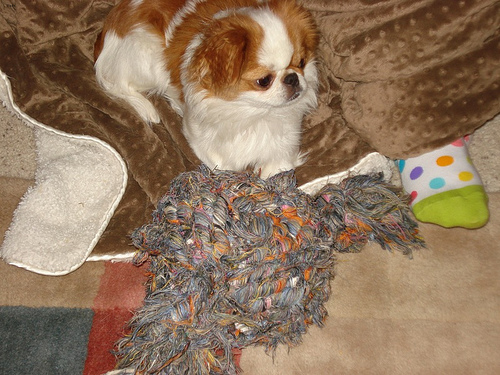

In [ ]:
im = Image.open(ims[0])
im

In [ ]:
make_crap = crappifier(path_lr, path_hr)
make_crap(im, 0)

AttributeError: 'JpegImageFile' object has no attribute 'relative_to'